In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

url ='https://raw.githubusercontent.com/Laxminarayen/Inceptz-Batch13-Analytics_and_Python/master/Hackathon/company.csv'

In [198]:
comp_df = pd.DataFrame(pd.read_csv(url))

In [199]:
print(comp_df.head(20))

    Company   Age  Salary       Place Country  Gender
0       TCS  20.0     NaN     Chennai   India       0
1   Infosys  30.0     NaN      Mumbai   India       0
2       TCS  35.0  2300.0    Calcutta   India       0
3   Infosys  40.0  3000.0       Delhi   India       0
4       TCS  23.0  4000.0      Mumbai   India       0
5   Infosys   NaN  5000.0    Calcutta   India       0
6       TCS   NaN  6000.0     Chennai   India       1
7   Infosys  23.0  7000.0      Mumbai   India       1
8       TCS  34.0  8000.0    Calcutta   India       1
9       CTS  45.0  9000.0       Delhi   India       0
10      CTS  23.0     NaN      Mumbai   India       0
11      CTS  34.0  1089.0    Calcutta   India       0
12      CTS  45.0     NaN     Chennai   India       0
13      CTS  18.0  1234.0      Mumbai   India       0
14  Infosys  40.0  3000.0    Calcutta   India       0
15      TCS  23.0  3000.0       Delhi   India       0
16  Infosys  23.0  3030.0  Podicherry   India       0
17      TCS  34.0  5000.0   

In [28]:
#print(comp_df.info())

In [200]:
comp_df = comp_df.dropna(subset = ['Company'])

In [201]:
comp_df['Salary'] = comp_df['Salary'].fillna(comp_df['Salary'].mean())

In [202]:
comp_df['Age'] = comp_df['Age'].fillna(comp_df['Age'].mean())

In [226]:
comp_df['Age'] = comp_df['Age'].astype(int)

In [204]:
comp_df['Salary'] = comp_df['Salary'].round(2)

In [205]:
comp_df['Place'] = comp_df['Place'].fillna('Others')

In [206]:
min_in = np.mean(comp_df['Age'])
comp_df['Age'] = np.where(comp_df['Age'] == 0, min_in,comp_df['Age'])

In [207]:
print(comp_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 147
Data columns (total 6 columns):
Company    140 non-null object
Age        140 non-null float64
Salary     140 non-null float64
Place      140 non-null object
Country    140 non-null object
Gender     140 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 7.7+ KB
None


In [47]:
#print(comp_df.Company.unique())

In [208]:
comp_df.loc[comp_df['Company']=='Congnizant','Company']='CTS'

In [209]:
comp_df.loc[comp_df['Company']=='Infosys Pvt Lmt','Company']='Infosys'

In [210]:
comp_df.loc[comp_df['Company']=='Tata Consultancy Services','Company']='TCS'

In [211]:
emp_count = comp_df.Company.value_counts()
#print(emp_count)

In [212]:
emp_df = pd.DataFrame(emp_count)

In [136]:
#print(emp_df)

Text(0.5, 1.0, 'Count Of Emp in Each Company')

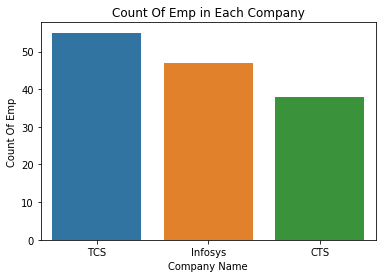

In [213]:
sns.barplot(x=emp_df.index,y=emp_df['Company'])
plt.ylabel('Count Of Emp')
plt.xlabel('Company Name')
plt.title('Count Of Emp in Each Company')

In [214]:
comp_df['count'] =1

In [215]:
cempcnt = comp_df.groupby(['Place']).count()['count']

In [216]:
cempcnt_df = pd.DataFrame(cempcnt)
#print(cempcnt_df)

Text(0.5, 1.0, 'Emp working in each city')

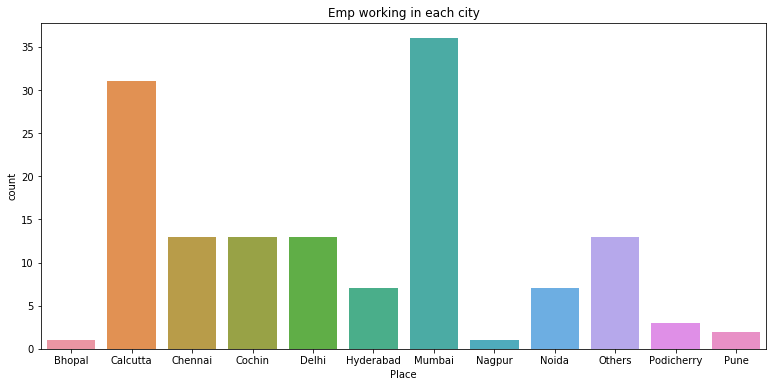

In [217]:
plt.figure(figsize = (13,6))
sns.barplot(x=cempcnt_df.index,y=cempcnt_df['count'])
plt.title('Emp working in each city')

## Average Salary of Employee working in different Organization

In [251]:
temp1 = comp_df.groupby(['Company']).mean()
print(temp1.iloc[:,1:2])

              Salary
Company             
CTS      4783.598947
Infosys  5326.651915
TCS      5573.326545


In [268]:
temp2 = comp_df.groupby(['Gender','Company']).count()['count']
#print(temp2)

In [265]:
temp2_df = pd.DataFrame(temp2)
print(temp2)

Gender  Company
0       CTS        30
        Infosys    40
        TCS        38
1       CTS         8
        Infosys     7
        TCS        17
Name: count, dtype: int64


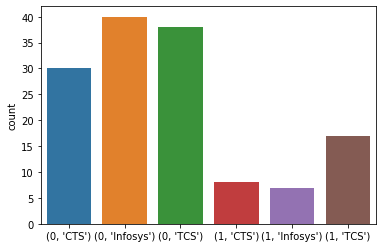

In [267]:
sns.barplot(x=temp2_df.index,y=temp2_df['count'])